# Scraping 15k Data Science Articles on Medium

Questoins to ask:


1.   What factors make an article receive a high number of claps
2.   What is the average number of claps? Some articles I came across have 100 or even 1000 claps. Is that a typical number of claps for a Data Science article?
3.  Which titles are most used by data science articles?
4.  What is the ideal reading time for a good article?
5.  Will publishing on the weekdays give more claps than the weekends?

[This](https://github.com/harrisonjansma/Medium_Scraper) repo was used to scrape the medium articles. The articles are published anytime between July 2019 and July 2020 and are related to 6 tags: Data science, Machine learning, AI, Python, Data visualization, Big data.









In [ ]:
!pip install datapane

In [7]:
!datapane login --token=142a946441e1487d633aaa63cae5a8eb8fcde317

Connected successfully to https://datapane.com as shubhamp.singh@yahoo.com


In [83]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab import files
files.download('/content/drive/MyDrive/medium-data.csv')

In [1]:
import datapane as dp 
import pandas as pd
import numpy as np

medium = pd.read_csv('medium-data.csv')


In [2]:
medium.head(10)


,Title,Subtitle,Image,Author,Publication,Year,Month,Day,Tag,Reading_Time,Claps,Comment,url,Author_url
0,Apply and Lambda usage in pandas,Learn these to master Pandas,1,Rahul Agarwal,Towards Data Science,2019,7,1,data_science,6,1.5K,0,https://towardsdatascience.com/apply-and-lambd...,https://towardsdatascience.com/@rahul_agarwal?...
1,Jupyter is the new Excel (but not for your boss),NaN,1,Dan Lester,Towards Data Science,2019,7,1,data_science,10,1.5K,0,https://towardsdatascience.com/jupyter-is-the-...,https://towardsdatascience.com/@dan_19973?sour...
2,Fuzzy matching at scale,From 3.7 hours to 0.2 seconds. How to perform ...,1,Josh Taylor,Towards Data Science,2019,7,1,data_science,7,547,0,https://towardsdatascience.com/fuzzy-matching-...,https://towardsdatascience.com/@thejoshtaylor?...
3,Artificial Intelligence in Video Games,An overview of how video game A.I. has develop...,1,Laura E Shummon Maass,Towards Data Science,2019,7,1,data_science,14,265,0,https://towardsdatascience.com/artificial-inte...,https://towardsdatascience.com/@laurashummonma...
4,Affinity Propagation Algorithm Explained,Affinity Propagation was first published in 20...,1,Cory Maklin,Towards Data Science,2019,7,1,data_science,6,92,0,https://towardsdatascience.com/unsupervised-ma...,https://towardsdatascience.com/@corymaklin?sou...
5,Deploying Models to Flask,A walk-through on how to deploy machine learni...,1,Jeremy Chow,Towards Data Science,2019,7,1,data_science,8,859,0,https://towardsdatascience.com/deploying-model...,https://towardsdatascience.com/@jeremyrchow?so...
6,"AI, Machine Learning, Deep Learning Explained ...","Supervised ML, Unsupervised ML, Reinforcement",1,Jun Wu,Towards Data Science,2019,7,1,data_science,7,406,0,https://towardsdatascience.com/ai-machine-lear...,https://towardsdatascience.com/@junwu_46652?so...
7,Tweepy for beginners,Using Twitters API to build your own data set,1,Richard Chadwick,Towards Data Science,2019,7,1,data_science,7,260,0,https://towardsdatascience.com/tweepy-for-begi...,https://towardsdatascience.com/@richchad?sourc...
8,BIRCH Clustering Algorithm Example In Python,Existing data clustering methods do not adequa...,1,Cory Maklin,Towards Data Science,2019,7,1,data_science,6,100,0,https://towardsdatascience.com/machine-learnin...,https://towardsdatascience.com/@corymaklin?sou...
9,"Zomato, Bangalore Data Analysis",What and where to eat in Bangalorea data scien...,1,Shubhankar Rawat,Towards Data Science,2019,7,1,data_science,15,190,0,https://towardsdatascience.com/zomato-bangalor...,https://towardsdatascience.com/@shubhankarrawa...


In [81]:
!pwd

/content


In [3]:
medium = medium.replace('nan', np.nan)

In [4]:
# Drop duplicated
medium = medium.drop_duplicates(subset=['Title', 'Subtitle', 'Author', 'Year',
                                  'Month', 'Day', 'Tag'])

In [13]:
medium.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 147392 entries, 0 to 148139
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   Title         138215 non-null  object
 1   Subtitle      88691 non-null   object
 2   Image         147392 non-null  int64 
 3   Author        147294 non-null  object
 4   Publication   71402 non-null   object
 5   Year          147392 non-null  int64 
 6   Month         147392 non-null  int64 
 7   Day           147392 non-null  int64 
 8   Tag           147392 non-null  object
 9   Reading_Time  147392 non-null  int64 
 10  Claps         147392 non-null  object
 11  Comment       147392 non-null  int64 
 12  url           147392 non-null  object
 13  Author_url    147294 non-null  object
dtypes: int64(6), object(8)
memory usage: 16.9+ MB


## Visualize Tags

In [ ]:
!pip install pyyaml==5.4.1

In [5]:
import plotly.express as px

# Save the charts to build an interactive report later
charts = []

tag_plot = px.bar(x=medium.Tag.value_counts().index,
      y=medium.Tag.value_counts().values,
                 labels={'y': 'Number of Articles',
                        'x': 'Tags'},
                 title='Number of articles in each data science-related topic')
tag_plot

/usr/local/lib/python3.7/dist-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [6]:
charts.append(dp.Plot(tag_plot))

Bokeh version 2.3.3 is not supported, these plots may not display correctly, please install version ~=2.2.0
Folium version 0.8.3 is not supported, these plots may not display correctly, please install version >=0.12.0


In [7]:
# Number of duplicated articles with different tags
sum(medium.iloc[:,:8].duplicated())

38516

In [8]:
# Drop duplicated
medium = medium.drop_duplicates(subset=['Title', 'Subtitle', 'Author', 'Year',
                                  'Month', 'Day'])

In [9]:
medium.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 108864 entries, 0 to 148139
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   Title         102376 non-null  object
 1   Subtitle      64990 non-null   object
 2   Image         108864 non-null  int64 
 3   Author        108776 non-null  object
 4   Publication   49457 non-null   object
 5   Year          108864 non-null  int64 
 6   Month         108864 non-null  int64 
 7   Day           108864 non-null  int64 
 8   Tag           108864 non-null  object
 9   Reading_Time  108864 non-null  int64 
 10  Claps         108864 non-null  object
 11  Comment       108864 non-null  int64 
 12  url           108864 non-null  object
 13  Author_url    108776 non-null  object
dtypes: int64(6), object(8)
memory usage: 12.5+ MB


## Comment

In [10]:

comment = px.pie(medium.groupby('Comment').count().reset_index(),
       values = 'Year',
       names = 'Comment',
       labels={'Year': 'Number of Articles'},
        title = 'Number of Comments in Data Science Articles'
      )
comment

In [11]:
charts.append(dp.Plot(comment))

## Claps

In [12]:
medium.Claps = medium.Claps.astype('object')
medium.Claps.describe()

count     108864
unique      1042
top            0
freq       40077
Name: Claps, dtype: object

In [13]:
def str_to_float(feature):
    '''Change string with K or M to a float (.i.e, 5k)'''
    
    feature = feature.replace(r'[KM]+$', '', regex=True).astype(float) * \
    feature.str.extract(r'[\d\.]+([KM]+)', expand=False).fillna(1).replace(['K','M'], [10**3, 10**6]).astype(int)
    
    return feature

In [14]:
medium.Claps = str_to_float(medium.Claps)

In [15]:
medium['Claps'].describe()

count    108864.000000
mean         67.885674
std         258.135934
min           0.000000
25%           0.000000
50%           3.000000
75%          55.000000
max       26000.000000
Name: Claps, dtype: float64

In [16]:
claps = px.histogram(medium.sort_values(by='Claps')[:80000],
            x='Claps',
            title='Number of Claps')

In [17]:
claps.show()

In [18]:
sum(medium.sort_values(by='Claps', ascending=False).head(int(len(medium)*0.01)).Claps)/sum(medium.Claps)

0.26129324009046445

1% of the users get 26% of the total claps!

In [19]:
charts.append(dp.Plot(claps))

In [20]:
readingTime_claps = px.scatter(medium,
          x='Reading_Time',
          y='Claps',
        title='Claps vs Reading Time')

readingTime_claps

In [21]:
medium.corr().loc['Reading_Time', 'Claps']

0.13013495586707033

In [22]:
charts.append(dp.Plot(readingTime_claps))

In [23]:
# Find average duration of reading time for top articles

medium[medium.Claps.between(63, medium.Claps.max())].Reading_Time.describe()

count    24854.000000
mean         6.580027
std          3.910119
min          0.000000
25%          4.000000
50%          6.000000
75%          8.000000
max        171.000000
Name: Reading_Time, dtype: float64

## How frequent an author publishes

In [24]:
# Group df by author and count the number of articles they publish
author_groupby = medium.groupby(['Author']).count().sort_values(by='Year', ascending=False).reset_index()

In [25]:
fig = px.bar(author_groupby[:100], 
             x='Author', 
             y='Year',
             labels={'Year': 'Number of articles'},
             title='Top 100 most active authors with topics related to data science'
            )
fig.update_layout({
    'plot_bgcolor': 'rgba(133, 227, 239, 0.04)',
})

fig.show()

In [26]:
charts.append(dp.Plot(fig))

In [27]:
sum(author_groupby.sort_values(by='Year', ascending=False).head(int(len(author_groupby)*0.01)).Year)/sum(author_groupby.Year)

0.15635802015150402

1% of the authors post 15.6% of the articles

In [28]:
author_rank = medium.Author.value_counts().index
100-(list(author_rank).index('Khuyen Tran')+1)/len(author_rank) * 100

99.85684944295761

In [29]:
author_rank = medium.Author.value_counts().index
100-(list(author_rank).index('Yaakov Bressler')+1)/len(author_rank) * 100

90.30932968195681

In [30]:
author_groupby.Year.median()

1.0

In [31]:
author_clap = medium.groupby(by='Author').median().sort_values(by='Claps', ascending=False)['Claps']

In [32]:
author_clap[author_rank].to_frame().rename({'Claps':'Mean Claps'}, axis=1)

,Mean Claps
,0.0
ODSC Open Data Science,22.0
Cloudmersive,0.0
Nick Komissarenko,0.0
Synced,71.0
...,...
sourabhXIII,8.0
Chaima Ennar,41.0
Lamarana BALDE,0.0
Korayzdemir,12.0


In [33]:
frequency_claps = author_groupby.join(author_clap[author_rank].to_frame().rename({'Claps':'Mean Claps'}, axis=1).reset_index())
frequency_claps

,Author,Title,Subtitle,Image,Publication,Year,Month,Day,Tag,Reading_Time,Claps,Comment,url,Author_url,index,Mean Claps
0,,519,327,618,192,618,618,618,618,618,618,618,618,618,,0.0
1,ODSC Open Data Science,386,134,386,17,386,386,386,386,386,386,386,386,386,ODSC Open Data Science,22.0
2,Cloudmersive,248,175,248,0,248,248,248,248,248,248,248,248,248,Cloudmersive,0.0
3,Nick Komissarenko,220,20,224,0,224,224,224,224,224,224,224,224,224,Nick Komissarenko,0.0
4,Synced,218,27,224,220,224,224,224,224,224,224,224,224,224,Synced,71.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48196,Jeremiah Tabb,1,1,1,1,1,1,1,1,1,1,1,1,1,sourabhXIII,8.0
48197,Jeremie ROBERRINI-NEVEU,1,1,1,1,1,1,1,1,1,1,1,1,1,Chaima Ennar,41.0
48198,Jeremy Battle,0,0,1,0,1,1,1,1,1,1,1,1,1,Lamarana BALDE,0.0
48199,Jeremy Bedolla,1,0,1,0,1,1,1,1,1,1,1,1,1,Korayzdemir,12.0


In [34]:
fig = px.scatter(frequency_claps,
          x='Year',
          y='Mean Claps',
          labels={'Year':'Publish Frequency',
                 'Mean Claps': 'Median Claps'},
          title='Publish Frequency vs Median Claps',
          hover_name='Author')
fig

In [35]:
frequency_claps.corr()['Year']['Mean Claps']

0.006048153138951482

In [37]:
#Create a Report for the Plots
dp.Report(dp.Plot(fig)).upload(name='frequency_claps',
                               headline='Publish Frequency vs Median Claps',
                               visibility='PUBLIC')

Uploading report and associated data - *please wait...*
Your report only contains a single element - did you know you can include additional plots, tables and text in a single report? More info at https://docs.datapane.com/reports/blocks/layout-pages-and-selects
Report successfully uploaded. View and share your report at https://datapane.com/reports/dA9QWnA/frequency-claps/, or edit your report at https://datapane.com/reports/dA9QWnA/frequency-claps/edit/.


## How frequent a publication publishes 

In [38]:
publication_groupby = medium.groupby(by='Publication').count().sort_values(by='Title',ascending=False).reset_index()[:40000]

fig = px.bar(publication_groupby[:50],
      x='Publication',
      y='Title',
    labels={'Title':'Number of article'},
             title='Top 50 most active data science publication',
            )
fig.update_layout({
    'plot_bgcolor': 'rgba(133, 227, 239, 0.04)',
    'margin': dict(b=250),
    'height': 600,
})

fig.update_traces(textposition='outside')

fig.update_xaxes(title_font_family="Arial",tickangle=45)


In [39]:
dp.Report(dp.Plot(fig)).upload(name='publication',
                               headline='Publication',
                               visibility='PUBLIC')

Uploading report and associated data - *please wait...*
Your report only contains a single element - did you know you can include additional plots, tables and text in a single report? More info at https://docs.datapane.com/reports/blocks/layout-pages-and-selects
Report successfully uploaded. View and share your report at https://datapane.com/reports/nkK1D23/publication/, or edit your report at https://datapane.com/reports/nkK1D23/publication/edit/.


In [40]:
charts.append(dp.Plot(fig))

In [41]:
sum(publication_groupby.sort_values(by='Year', ascending=False).head(int(len(publication_groupby)*0.01)).Year)/sum(publication_groupby.Year)

0.6225407930121115

1% of the publications post 62% of the articles

## Find the date of the week

In [42]:
import datetime

In [43]:
medium['Dates'] = medium.apply(lambda row: datetime.date(row.Year,row.Month,row.Day), axis=1)

In [44]:
dates_groupby = medium.groupby('Dates').count().reset_index()

In [45]:
dates = px.line(dates_groupby,
        x='Dates',
       y='Year',
        labels={'Year':'Number of articles'},
        title='Number of articles from July 2019 to the beginning of July 2020')

dates 

In [46]:
dp.Report(dp.Plot(dates)).upload(name='dates',
                                 headline='Dates')

Uploading report and associated data - *please wait...*
Your report only contains a single element - did you know you can include additional plots, tables and text in a single report? More info at https://docs.datapane.com/reports/blocks/layout-pages-and-selects
Report successfully uploaded. View and share your report at https://datapane.com/reports/P3X9E57/dates/, or edit your report at https://datapane.com/reports/P3X9E57/dates/edit/.


In [47]:
charts.append(dp.Plot(dates))

In [48]:
def date_to_weekday(year, month, day):
    '''Find the day of the week with regarding to the date'''
    
    return datetime.date(year, month, day).weekday()

years = list(medium.Year)
months = list(medium.Month)
days = list(medium.Day)

medium['week_days'] = medium.apply(lambda row: date_to_weekday(row.Year, row.Month, row.Day), axis=1)



In [49]:
# Map the number to the day of the week
day_of_week = {0: 'Monday',
              1: 'Tuesday',
              2: 'Wednesday',
              3: 'Thursday',
              4: 'Friday',
              5: 'Saturday',
              6: 'Sunday'}
medium['week_days'].replace(day_of_week, inplace=True)

In [50]:
day_groupby = medium.groupby(by='week_days').count()
day_groupby = day_groupby.reindex(['Monday', 'Tuesday', 'Wednesday',
                        'Thursday', 'Friday', 'Saturday',
                        'Sunday']).reset_index()

In [51]:
day_groupby

,week_days,Title,Subtitle,Image,Author,Publication,Year,Month,Day,Tag,Reading_Time,Claps,Comment,url,Author_url,Dates
0,Monday,17374,10986,18397,18381,8727,18397,18397,18397,18397,18397,18397,18397,18397,18381,18397
1,Tuesday,16989,10653,18018,17999,8428,18018,18018,18018,18018,18018,18018,18018,18018,17999,18018
2,Wednesday,16105,10037,17091,17079,7809,17091,17091,17091,17091,17091,17091,17091,17091,17079,17091
3,Thursday,15545,9795,16527,16511,7618,16527,16527,16527,16527,16527,16527,16527,16527,16511,16527
4,Friday,14992,9399,15985,15965,7243,15985,15985,15985,15985,15985,15985,15985,15985,15965,15985
5,Saturday,10071,6674,10778,10775,4541,10778,10778,10778,10778,10778,10778,10778,10778,10775,10778
6,Sunday,11300,7446,12068,12066,5091,12068,12068,12068,12068,12068,12068,12068,12068,12066,12068


In [52]:
publish_dates = px.bar(day_groupby,
                       x='week_days',
                       y='Year',
                       labels={'week_days':'Day of the week', 
                               'Year':'Number of articles'})
publish_dates

In [53]:
dp.Report(dp.Plot(publish_dates)).upload(name='day_of_week',
                                         headline='Day of Week')

Uploading report and associated data - *please wait...*
Your report only contains a single element - did you know you can include additional plots, tables and text in a single report? More info at https://docs.datapane.com/reports/blocks/layout-pages-and-selects
Report successfully uploaded. View and share your report at https://datapane.com/reports/d7d9YQk/day-of-week/, or edit your report at https://datapane.com/reports/d7d9YQk/day-of-week/edit/.


In [54]:
charts.append(dp.Plot(publish_dates))

In [55]:
fig = px.bar(medium.groupby(by='week_days').mean()['Claps'].reset_index(),
      x='week_days',
      y='Claps',
      labels={'week_days':'Days of the week'},
      title='Average number of claps on each day of a week')

In [56]:
fig.show()

In [57]:
dp.Report(dp.Plot(fig)).upload(name='claps_days',
                               headline='Claps vs Days')

Uploading report and associated data - *please wait...*
Your report only contains a single element - did you know you can include additional plots, tables and text in a single report? More info at https://docs.datapane.com/reports/blocks/layout-pages-and-selects
Report successfully uploaded. View and share your report at https://datapane.com/reports/MA1QvwA/claps-days/, or edit your report at https://datapane.com/reports/MA1QvwA/claps-days/edit/.


In [58]:
charts.append(dp.Plot(fig))

## Fill in missing titles

In [59]:
import re 
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt
import math

def url_to_title(url):
    '''Find title from url'''

    url = url.replace('https://towardsdatascience.com/', '')
    url = url.replace('https://medium.com/', '')
    url = re.sub(r'.*/', '', url)
    url = re.sub(r'([A-Za-z]+[\d@]+[\w@]*|[\d@]+[A-Za-z]+[\w@]*).+', '', url)
    title = url.replace('-', ' ')

    return title

null_urls = (list(medium.loc[medium.Title.isnull(), 'url']))

null_titles = []
for url in null_urls:
    null_titles.append(url_to_title(url))

medium.loc[medium.Title.isnull(), 'Title'] = null_titles

In [60]:
def process_text(texts: list):
    
       
    processed = []
        
    for text in texts:
        

        # lowercase
        text = text.lower()

        #remove punctuation
        text = text.translate(str.maketrans('', '', string.punctuation))

        #remove stopwords
        stop_words = set(stopwords.words('english'))

        #tokenize
        tokens = word_tokenize(text)
        new_text = [i for i in tokens if not i in stop_words]

        new_text = ' '.join(new_text)

        processed.append(new_text)    

    return processed


In [61]:
text_features = ['Title', 'Subtitle']

In [62]:
# Replace nan with None

def isNaN(string):
    return string != string

subtitle = medium.Subtitle.fillna('None')


In [67]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [68]:
subtitle = process_text(list(subtitle))


In [69]:
titles = process_text(list(medium.Title))


In [70]:
combine_titles = ' '.join(titles) + ' '.join([text for text in subtitle if text !='none'])

In [71]:
def make_wordcloud(new_text):
    ''''funciton to make wordcloud'''
    
    wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 10).generate(new_text) 

    
    fig = plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 

    plt.show() 
    
    return fig

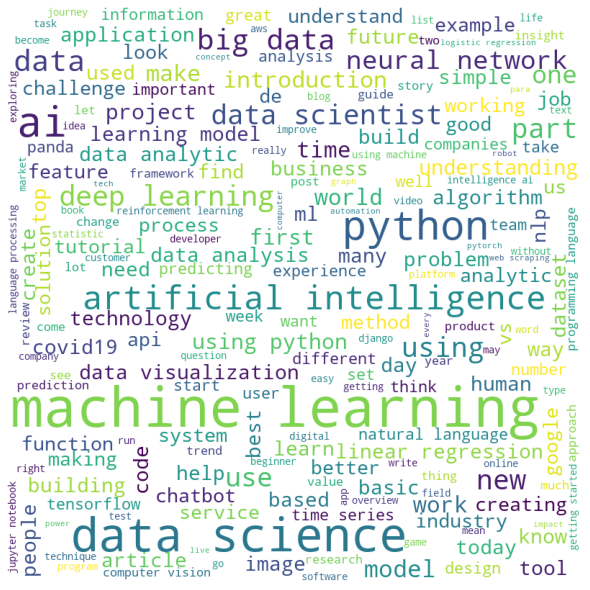

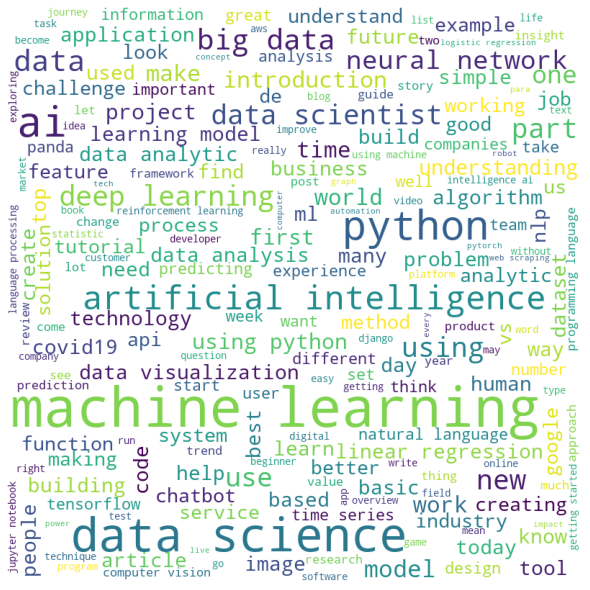

In [72]:
cloud = make_wordcloud(combine_titles)
cloud 

In [73]:
dp.Report(dp.Plot(cloud)).upload(name='cloud',
                                 headline= 'Titles')

Uploading report and associated data - *please wait...*
Your report only contains a single element - did you know you can include additional plots, tables and text in a single report? More info at https://docs.datapane.com/reports/blocks/layout-pages-and-selects
Report successfully uploaded. View and share your report at https://datapane.com/reports/Y3YKGLk/cloud/, or edit your report at https://datapane.com/reports/Y3YKGLk/cloud/edit/.


In [74]:
charts.append(dp.Plot(cloud))

In [76]:
dp.Report(*charts).upload(name='medium_visualization',
                          headline='Data Science Articles on Medium from 2019/7 to 2020/7')

Uploading report and associated data - *please wait...*
Report successfully uploaded. View and share your report at https://datapane.com/reports/E7yrOlk/medium-visualization/, or edit your report at https://datapane.com/reports/E7yrOlk/medium-visualization/edit/.


In [77]:
medium 

,Title,Subtitle,Image,Author,Publication,Year,Month,Day,Tag,Reading_Time,Claps,Comment,url,Author_url,Dates,week_days
0,Apply and Lambda usage in pandas,Learn these to master Pandas,1,Rahul Agarwal,Towards Data Science,2019,7,1,data_science,6,1500.0,0,https://towardsdatascience.com/apply-and-lambd...,https://towardsdatascience.com/@rahul_agarwal?...,2019-07-01,Monday
1,Jupyter is the new Excel (but not for your boss),NaN,1,Dan Lester,Towards Data Science,2019,7,1,data_science,10,1500.0,0,https://towardsdatascience.com/jupyter-is-the-...,https://towardsdatascience.com/@dan_19973?sour...,2019-07-01,Monday
2,Fuzzy matching at scale,From 3.7 hours to 0.2 seconds. How to perform ...,1,Josh Taylor,Towards Data Science,2019,7,1,data_science,7,547.0,0,https://towardsdatascience.com/fuzzy-matching-...,https://towardsdatascience.com/@thejoshtaylor?...,2019-07-01,Monday
3,Artificial Intelligence in Video Games,An overview of how video game A.I. has develop...,1,Laura E Shummon Maass,Towards Data Science,2019,7,1,data_science,14,265.0,0,https://towardsdatascience.com/artificial-inte...,https://towardsdatascience.com/@laurashummonma...,2019-07-01,Monday
4,Affinity Propagation Algorithm Explained,Affinity Propagation was first published in 20...,1,Cory Maklin,Towards Data Science,2019,7,1,data_science,6,92.0,0,https://towardsdatascience.com/unsupervised-ma...,https://towardsdatascience.com/@corymaklin?sou...,2019-07-01,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148132,Hbase master.HMaster: Failed to become active ...,NaN,1,Deepesh Tripathi,NaN,2020,7,1,big_data,3,0.0,0,https://medium.com/@deepeshtripathi/hbase-mast...,https://medium.com/@deepeshtripathi?source=tag...,2020-07-01,Wednesday
148134,Safe Stock Concept,Safety Stock,1,Ole Ersoy,NaN,2020,7,1,big_data,1,0.0,0,https://medium.com/@ole.ersoy/safe-stock-conce...,https://medium.com/@ole.ersoy?source=tag_archi...,2020-07-01,Wednesday
148137,2019,"201958616()33,867()1,409,496()",1,Buffon Digital Technology,Buffondt,2020,7,1,big_data,6,0.0,0,https://medium.com/buffondt/2019%E5%B9%B4-%E8%...,https://medium.com/@buffondt.inc?source=tag_ar...,2020-07-01,Wednesday
148138,How data virtualisation could help to mitigate...,Data virtualisation is,1,Digital Bulletin,Digital Bulletin,2020,7,1,big_data,4,0.0,0,https://medium.com/digital-bulletin/how-data-v...,https://medium.com/@DigitalBulletin?source=tag...,2020-07-01,Wednesday
